<a href="https://colab.research.google.com/github/AlexHyunnamShim/MovingAverageCrossoverStock/blob/main/moving_average_crossover_trader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Does moving average crossover to determine when to buy/sell stock

#libs
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#Load data
from google.colab import files
uploaded = files.upload()


Saving AAPL.csv to AAPL.csv


In [5]:
#Store data
AAPL = pd.read_csv('AAPL.csv')
AAPL

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-13,125.269997,125.389999,119.650002,121.099998,120.326080,262330500
1,2020-10-14,121.000000,123.029999,119.620003,121.190002,120.415504,150712000
2,2020-10-15,118.720001,121.199997,118.150002,120.709999,119.938568,112559200
3,2020-10-16,121.279999,121.550003,118.809998,119.019997,118.259369,115393800
4,2020-10-19,119.959999,120.419998,115.660004,115.980003,115.238815,120639300
...,...,...,...,...,...,...,...
247,2021-10-06,139.470001,142.149994,138.369995,142.000000,142.000000,83221100
248,2021-10-07,143.059998,144.220001,142.720001,143.289993,143.289993,61732700
249,2021-10-08,144.029999,144.179993,142.559998,142.899994,142.899994,58718700
250,2021-10-11,142.270004,144.809998,141.809998,142.809998,142.809998,64452200


<function matplotlib.pyplot.show>

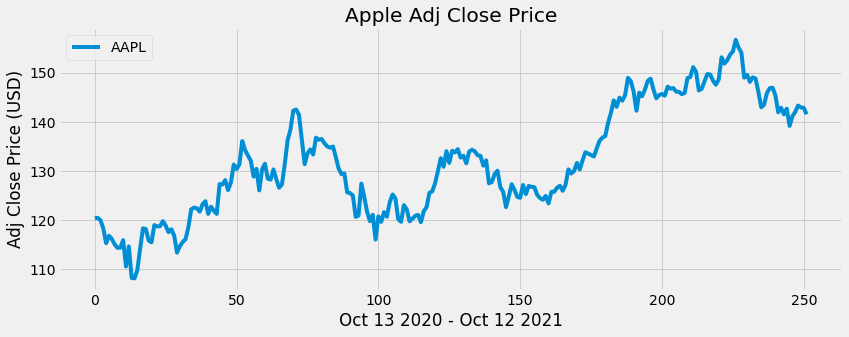

In [6]:
#Visualize data
plt.figure(figsize=(12.5,4.5))
plt.plot(AAPL['Adj Close'], label = 'AAPL')
plt.title('Apple Adj Close Price')
plt.xlabel('Oct 13 2020 - Oct 12 2021')
plt.ylabel('Adj Close Price (USD)')
plt.legend(loc='upper left')
plt.show()

In [7]:
#Create simple moving average with 5 day window
SMA5 = pd.DataFrame()
SMA5['Adj Close'] = AAPL['Adj Close'].rolling(window=5).mean()
SMA5

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,118.835667
...,...
247,141.279999
248,141.637997
249,141.687997
250,142.421997


In [8]:
#Create simple moving average with 20 day window
SMA20 = pd.DataFrame()
SMA20['Adj Close'] = AAPL['Adj Close'].rolling(window=20).mean()
SMA20

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
247,145.353500
248,144.814499
249,144.510999
250,144.173998


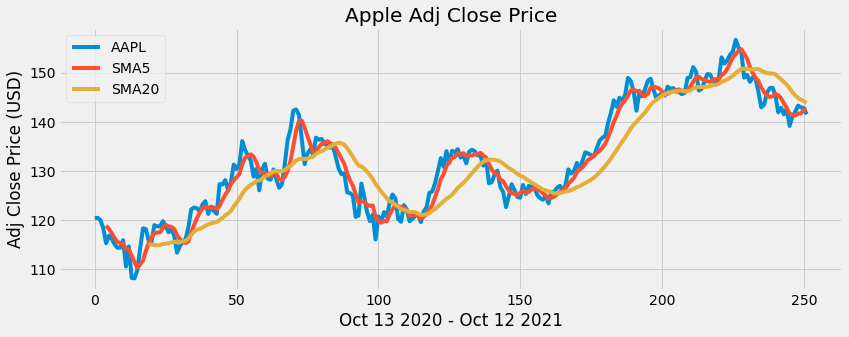

In [9]:
#Visualize SMA data
#Visualize data
plt.figure(figsize=(12.5,4.5))
plt.plot(AAPL['Adj Close'], label = 'AAPL')
plt.plot(SMA5['Adj Close'], label = 'SMA5')
plt.plot(SMA20['Adj Close'], label = 'SMA20')
plt.title('Apple Adj Close Price')
plt.xlabel('Oct 13 2020 - Oct 12 2021')
plt.ylabel('Adj Close Price (USD)')
plt.legend(loc='upper left')
plt.show()

In [11]:
#Create new dataframe to store all data
data = pd.DataFrame()
data['AAPL'] = AAPL['Adj Close']
data['SMA5'] = SMA5['Adj Close']
data['SMA20'] = SMA20['Adj Close']
data

,AAPL,SMA5,SMA20
0,120.326080,NaN,NaN
1,120.415504,NaN,NaN
2,119.938568,NaN,NaN
3,118.259369,NaN,NaN
4,115.238815,118.835667,NaN
...,...,...,...
247,142.000000,141.279999,145.353500
248,143.289993,141.637997,144.814499
249,142.899994,141.687997,144.510999
250,142.809998,142.421997,144.173998


In [23]:
#Create a function to return times to buy and sell
def buy_sell(data):
  sigBuy = []
  sigSell = []
  flag = -1
  for i in range(len(data)):
    if data['SMA5'][i] > data['SMA20'][i]:
      if flag != 1:
        sigBuy.append(data['AAPL'][i])
        sigSell.append(np.nan)
        flag = 1
      else:
        sigBuy.append(np.nan)
        sigSell.append(np.nan)
    elif  data['SMA5'][i] < data['SMA20'][i]:
      if flag != 0:
        sigBuy.append(np.nan)
        sigSell.append(data['AAPL'][i])
        flag = 0
      else:
        sigBuy.append(np.nan)
        sigSell.append(np.nan)
    else:
      sigBuy.append(np.nan)
      sigSell.append(np.nan)
  return [sigBuy, sigSell]

In [24]:
#Store buy and sell data into variable
buy_sell_data = buy_sell(data)
data['Buy_Price'] = buy_sell_data[0]
data['Sell_Price'] = buy_sell_data[1]
#Show data
data

,AAPL,SMA5,SMA20,Buy_Price,Sell_Price
0,120.326080,NaN,NaN,NaN,NaN
1,120.415504,NaN,NaN,NaN,NaN
2,119.938568,NaN,NaN,NaN,NaN
3,118.259369,NaN,NaN,NaN,NaN
4,115.238815,118.835667,NaN,NaN,NaN
...,...,...,...,...,...
247,142.000000,141.279999,145.353500,NaN,NaN
248,143.289993,141.637997,144.814499,NaN,NaN
249,142.899994,141.687997,144.510999,NaN,NaN
250,142.809998,142.421997,144.173998,NaN,NaN


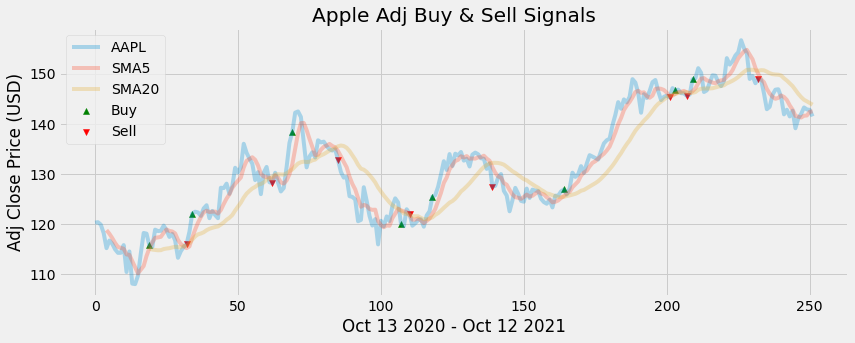

In [25]:
#Visualize data
plt.figure(figsize=(12.6,4.6))
plt.plot(data['AAPL'], label = 'AAPL', alpha = 0.3)
plt.plot(data['SMA5'], label = 'SMA5', alpha = 0.3)
plt.plot(data['SMA20'], label = 'SMA20', alpha = 0.3)
plt.scatter(data.index, data['Buy_Price'], label = 'Buy', marker ='^', color ='green')
plt.scatter(data.index, data['Sell_Price'], label = 'Sell', marker ='v', color ='red')
plt.title('Apple Adj Buy & Sell Signals')
plt.xlabel('Oct 13 2020 - Oct 12 2021')
plt.ylabel('Adj Close Price (USD)')
plt.legend(loc='upper left')
plt.show()
